<a href="https://colab.research.google.com/github/Akash-sk-bio/fake-profile-detection/blob/main/fake-profile-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries (uncomment and run if not already installed)
!pip install pandas numpy scikit-learn tensorflow matplotlib

# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Load the fake profiles dataset
fake_df = pd.read_csv('fusers.csv')
fake_df['label'] = 0  # Label for fake profiles

# Load the real profiles dataset
real_df = pd.read_csv('users.csv')
real_df['label'] = 1  # Label for real profiles

# Display the first few rows of each dataset
print("Fake Profiles:")
display(fake_df.head())

print("\nReal Profiles:")
display(real_df.head())

# Merge the two datasets
merged_df = pd.concat([fake_df, real_df], axis=0).reset_index(drop=True)

# Shuffle the dataset to ensure random distribution
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the combined dataset
print("\nMerged Dataset:")
display(merged_df.head())

# Check for class imbalance
print("\nClass Distribution:")
print(merged_df['label'].value_counts())


Fake Profiles:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,updated,label
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,NaN,NaN,NaN,NaN,NaN,real estate sales,NaN,NaN,6/12/2013 18:38,0
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/12/2013 18:38,0
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,NaN,NaN,NaN,NaN,NaN,le corna del capro scappato dal gregge s'infil...,NaN,NaN,6/12/2013 18:38,0
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/12/2013 18:38,0
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,NaN,NaN,NaN,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",NaN,NaN,6/11/2013 17:39,0



Real Profiles:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,label
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,6/11/2013 13:20,5/2/2015 6:41,3/15/2016 15:53,0,0,1
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,5/13/2014 12:37,5/1/2015 17:20,3/15/2016 15:53,0,0,1
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,5/5/2011 1:30,5/1/2015 18:48,3/15/2016 15:53,0,0,1
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,9/17/2010 16:02,5/1/2015 13:55,3/15/2016 15:53,0,0,1
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2/6/2015 5:10,5/2/2015 1:17,3/15/2016 15:53,0,0,1



Merged Dataset:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,notifications,description,contributors_enabled,following,updated,label,timestamp,crawled_at,test_set_1,test_set_2
0,63478699,Randolph Reynoldson,MarLuth,1,8,550,0,0,Thu Aug 06 16:07:39 +0000 2009,NaN,...,NaN,NaN,NaN,NaN,6/12/2013 18:38,0,NaN,NaN,NaN,NaN
1,617025589,Noel Reynolds,noelreynoldswmx,37,21,336,0,0,Sun Jun 24 11:09:38 +0000 2012,NaN,...,NaN,Live eachday asif it's your last❤,NaN,NaN,6/12/2013 18:38,0,NaN,NaN,NaN,NaN
2,238588883,AhmeD,Engr_13,383,241,345,659,1,Sat Jan 15 14:46:09 +0000 2011,NaN,...,NaN,Muslim | Passionate | Positive | Reader ...,NaN,NaN,3/15/2016 15:56,1,1/15/2011 15:46,5/1/2015 16:10,0.0,0.0
3,616304133,Pauletta Hopkins,paulettaafxy,36,20,565,0,0,Sat Jun 23 15:51:46 +0000 2012,NaN,...,NaN,#TeamPittman #TeamGetMoney #TeamEngaged #TeamR...,NaN,NaN,6/11/2013 17:39,0,NaN,NaN,NaN,NaN
4,481913106,neil,fratstylesziall,21611,3535,2689,5201,16,Fri Feb 03 09:45:01 +0000 2012,NaN,...,NaN,"He strums the guitar, jumps up to 40 ft and he...",NaN,NaN,3/15/2016 16:04,1,2/3/2012 10:45,5/1/2015 13:04,0.0,0.0



Class Distribution:
label
1    3474
0    3351
Name: count, dtype: int64


In [4]:
# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Option 1: Drop rows with missing values
# merged_df = merged_df.dropna()

# Option 2: Fill missing values
# For numerical columns, fill with mean
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(merged_df.isnull().sum())



Missing Values:
id                                       0
name                                     1
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   5458
lang                                     0
time_zone                             4015
location                              1684
default_profile                       2759
default_profile_image                 6806
geo_enabled                           4531
profile_image_url                        0
profile_banner_url                    3593
profile_use_background_image           399
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color         

In [6]:
# Identify categorical columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)

# For simplicity, let's assume we drop textual columns like 'name' and 'screen_name'
# Alternatively, you can use embeddings or other techniques for text data
# Here, we'll drop them
merged_df = merged_df.drop(columns=['name', 'screen_name'])  # Replace with actual column names

# If there are any remaining categorical columns, apply Label Encoding or One-Hot Encoding
# Example: If there's a 'gender' column
if 'gender' in merged_df.columns:
    le = LabelEncoder()
    merged_df['gender'] = le.fit_transform(merged_df['gender'])


Categorical Columns: ['name', 'screen_name', 'created_at', 'url', 'lang', 'time_zone', 'location', 'profile_image_url', 'profile_banner_url', 'profile_background_image_url_https', 'profile_text_color', 'profile_image_url_https', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_background_image_url', 'profile_background_color', 'profile_link_color', 'description', 'updated', 'timestamp', 'crawled_at']


In [34]:
# Identify numerical columns (after dropping categorical/textual columns)
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('label')  # Exclude the target variable

print("\nNumerical Columns:", numerical_cols)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# Display the scaled features
display(merged_df.head())



Numerical Columns: ['id', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'default_profile', 'default_profile_image', 'geo_enabled', 'profile_use_background_image', 'profile_background_tile', 'utc_offset', 'is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled', 'following', 'test_set_1', 'test_set_2']


,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,...,notifications,description,contributors_enabled,following,updated,label,timestamp,crawled_at,test_set_1,test_set_2
0,-1.026530,-0.369212,-0.057710,0.039663,-0.278323,-0.088184,Thu Aug 06 16:07:39 +0000 2009,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,nl,0.0,0.0,6/12/2013 18:38,0,4/28/2009 22:36,5/1/2015 12:56,-1.213561e-16,1.131067e-16
1,-0.304043,-0.367678,-0.056653,-0.144947,-0.278323,-0.088184,Sun Jun 24 11:09:38 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,Live eachday asif it's your last❤,0.0,0.0,6/12/2013 18:38,0,4/28/2009 22:36,5/1/2015 12:56,-1.213561e-16,1.131067e-16
2,-0.797977,-0.352937,-0.038768,-0.137183,-0.201226,-0.079330,Sat Jan 15 14:46:09 +0000 2011,http://t.co/0c9HL6Xn9G,en,Islamabad,...,0.0,Muslim | Passionate | Positive | Reader ...,0.0,0.0,3/15/2016 15:56,1,1/15/2011 15:46,5/1/2015 16:10,-8.911208e-01,-5.679826e-01
3,-0.304985,-0.367721,-0.056734,0.052603,-0.278323,-0.088184,Sat Jun 23 15:51:46 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,#TeamPittman #TeamGetMoney #TeamEngaged #TeamR...,0.0,0.0,6/11/2013 17:39,0,4/28/2009 22:36,5/1/2015 12:56,-1.213561e-16,1.131067e-16
4,-0.480391,0.551451,0.229021,1.884899,0.330151,0.053479,Fri Feb 03 09:45:01 +0000 2012,http://t.co/0c9HL6Xn9G,en,Amsterdam,...,0.0,"He strums the guitar, jumps up to 40 ft and he...",0.0,0.0,3/15/2016 16:04,1,2/3/2012 10:45,5/1/2015 13:04,-8.911208e-01,-5.679826e-01


from matplotlib import pyplot as plt
_df_28['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['statuses_count'].plot(kind='hist', bins=20, title='statuses_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['followers_count'].plot(kind='hist', bins=20, title='followers_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('created_at').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('time_zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('profile_image_url').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='index', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='id', y='statuses_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='statuses_count', y='followers_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='followers_count', y='friends_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('created_at')):
  _plot_series(series, series_name, i)
  fig.legend(title='created_at', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time_zone')):
  _plot_series(series, series_name, i)
  fig.legend(title='time_zone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('location')):
  _plot_series(series, series_name, i)
  fig.legend(title='location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('profile_image_url')):
  _plot_series(series, series_name, i)
  fig.legend(title='profile_image_url', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
_df_44['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['statuses_count'].plot(kind='line', figsize=(8, 4), title='statuses_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['followers_count'].plot(kind='line', figsize=(8, 4), title='followers_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time_zone'].value_counts()
    for x_label, grp in _df_48.groupby('created_at')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('created_at')
_ = plt.ylabel('time_zone')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['location'].value_counts()
    for x_label, grp in _df_49.groupby('time_zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('time_zone')
_ = plt.ylabel('location')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['profile_image_url'].value_counts()
    for x_label, grp in _df_50.groupby('location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('location')
_ = plt.ylabel('profile_image_url')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['profile_banner_url'].value_counts()
    for x_label, grp in _df_51.groupby('profile_image_url')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('profile_image_url')
_ = plt.ylabel('profile_banner_url')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['created_at'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='index', y='created_at', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['time_zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='index', y='time_zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='index', y='location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['profile_image_url'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='index', y='profile_image_url', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
# Define features and target
X = merged_df.drop(columns=['label']).values
y = merged_df['label'].values

print("\nFeature Shape:", X.shape)
print("Target Shape:", y.shape)

# Reshape X for CNN input (samples, timesteps, features)
# Here, we'll treat each feature as a timestep with one feature per timestep
# This is one way to adapt tabular data for 1D CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

print("\nReshaped Feature Shape for CNN:", X.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Feature Shape: (6825, 40)
Target Shape: (6825,)

Reshaped Feature Shape for CNN: (6825, 40, 1)

Training Set Shape: (5460, 40, 1)
Testing Set Shape: (1365, 40, 1)


In [9]:
# Define the CNN model
model = Sequential()

# Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 17, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,289 (610.50 KB)

 Trainable params: 156,289 (610.50 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model
# Convert X_train and y_train to float32 to ensure compatibility with TensorFlow
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

history = model.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs for better learning
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5152 - loss: 0.6928 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5033 - loss: 0.6932 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4970 - loss: 0.6934 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5046 - loss: 0.6932 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5113 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5259 - loss: 0.6924 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 

In [11]:
# Identify numerical columns (after dropping categorical/textual columns)
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('label')  # Exclude the target variable

print("\nNumerical Columns:", numerical_cols)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# Check and handle NaN or inf values after scaling
merged_df = merged_df.fillna(0) # Replace NaN with 0
merged_df = merged_df.replace([np.inf, -np.inf], 0) # Replace inf with 0

# Display the scaled features
display(merged_df.head())


Numerical Columns: ['id', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'default_profile', 'default_profile_image', 'geo_enabled', 'profile_use_background_image', 'profile_background_tile', 'utc_offset', 'is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled', 'following', 'test_set_1', 'test_set_2']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,...,notifications,description,contributors_enabled,following,updated,label,timestamp,crawled_at,test_set_1,test_set_2
0,-1.026530,-0.369212,-0.057710,0.039663,-0.278323,-0.088184,Thu Aug 06 16:07:39 +0000 2009,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,nl,0.0,0.0,6/12/2013 18:38,0,4/28/2009 22:36,5/1/2015 12:56,-8.127417e-17,1.316219e-17
1,-0.304043,-0.367678,-0.056653,-0.144947,-0.278323,-0.088184,Sun Jun 24 11:09:38 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,Live eachday asif it's your last❤,0.0,0.0,6/12/2013 18:38,0,4/28/2009 22:36,5/1/2015 12:56,-8.127417e-17,1.316219e-17
2,-0.797977,-0.352937,-0.038768,-0.137183,-0.201226,-0.079330,Sat Jan 15 14:46:09 +0000 2011,http://t.co/0c9HL6Xn9G,en,Islamabad,...,0.0,Muslim | Passionate | Positive | Reader ...,0.0,0.0,3/15/2016 15:56,1,1/15/2011 15:46,5/1/2015 16:10,-8.911208e-01,-5.679826e-01
3,-0.304985,-0.367721,-0.056734,0.052603,-0.278323,-0.088184,Sat Jun 23 15:51:46 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,#TeamPittman #TeamGetMoney #TeamEngaged #TeamR...,0.0,0.0,6/11/2013 17:39,0,4/28/2009 22:36,5/1/2015 12:56,-8.127417e-17,1.316219e-17
4,-0.480391,0.551451,0.229021,1.884899,0.330151,0.053479,Fri Feb 03 09:45:01 +0000 2012,http://t.co/0c9HL6Xn9G,en,Amsterdam,...,0.0,"He strums the guitar, jumps up to 40 ft and he...",0.0,0.0,3/15/2016 16:04,1,2/3/2012 10:45,5/1/2015 13:04,-8.911208e-01,-5.679826e-01


In [43]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs for better learning
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5075 - loss: 0.6931 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5023 - loss: 0.6933 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5118 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5249 - loss: 0.6924 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5082 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5096 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929


In [37]:
# Evaluate on test data
# Check and handle NaN or inf values in X_test
X_test = np.nan_to_num(X_test)  # Replace NaN and inf with 0

# Identify columns with date strings (assuming they are of object type)
date_columns = np.where(X_test.dtype == object)[0]

# Convert date strings to numerical representation (e.g., timestamps)
# Iterate over the date columns
for col in date_columns:
    # Iterate
  pass # or your intended code within the loop

<ipython-input-37-01db8f9d81c1>:6: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  date_columns = np.where(X_test.dtype == object)[0]


In [40]:
# Evaluate on test data
# Check and handle NaN or inf values in X_test
X_test = np.nan_to_num(X_test)  # Replace NaN and inf with 0

# Check for unsupported object types and convert them to numerical representations if necessary
for i in range (X_test.shape[0]):
  for j in range(X_test.shape[1]):
    if not isinstance(X_test[i,j], (int, float, np.number)):
      try:
        X_test[i,j] = float(X_test[i,j])
      except ValueError:
        # Handle cases where conversion to float is not possible
        X_test[i, j] = 0  # Or another appropriate handling strategy


# Convert X_test to float32 after handling NaN, inf, and dates
X_test = X_test.astype('float32')

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("\nClassification Report:")
print(cr)

<ipython-input-40-e484543374fd>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_test[i,j] = float(X_test[i,j])



Test Accuracy: 0.4908
Test Loss: nan
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Confusion Matrix:
[[670   0]
 [695   0]]

Classification Report:
              precision    recall  f1-score   support

        Fake       0.49      1.00      0.66       670
        Real       0.00      0.00      0.00       695

    accuracy                           0.49      1365
   macro avg       0.25      0.50      0.33      1365
weighted avg       0.24      0.49      0.32      1365



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Assuming 'model' is your defined model and you have your training data (X_train, y_train)
# Train your model and store the training history

# Check and handle NaN or inf values in X_train
X_train = np.nan_to_num(X_train)  # Replace NaN and inf with 0

# Convert to string type to allow iteration over individual elements
X_train = X_train.astype(str)

# Iterate over each element in the array and try to convert dates
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[1]):
        try:
            # Try converting using pandas Timestamp
            X_train[i, j] = pd.Timestamp(X_train[i, j]).timestamp()
        except:
            # If pandas fails, try using dateutil parser
            try:
                import dateutil.parser
                X_train[i, j] = dateutil.parser.parse(X_train[i, j]).timestamp()
            except:
                # Handle the case where date conversion fails
                X_train[i,j] = 0 # Set a default value (e.g., 0)

# Convert X_train to float32 after handling NaN, inf, and dates
X_train = X_train.astype('float32')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting Accuracy
plt.figure(figsize=(14, 6))

plt

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5058 - loss: 0.6931 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5016 - loss: 0.6933 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5128 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4992 - loss: 0.6933 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4981 - loss: 0.6934 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5028 - loss: 0.6932 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4944 - loss: 0.6935 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4932 - loss: 0.6936 - val_accuracy: 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1400x600 with 0 Axes>

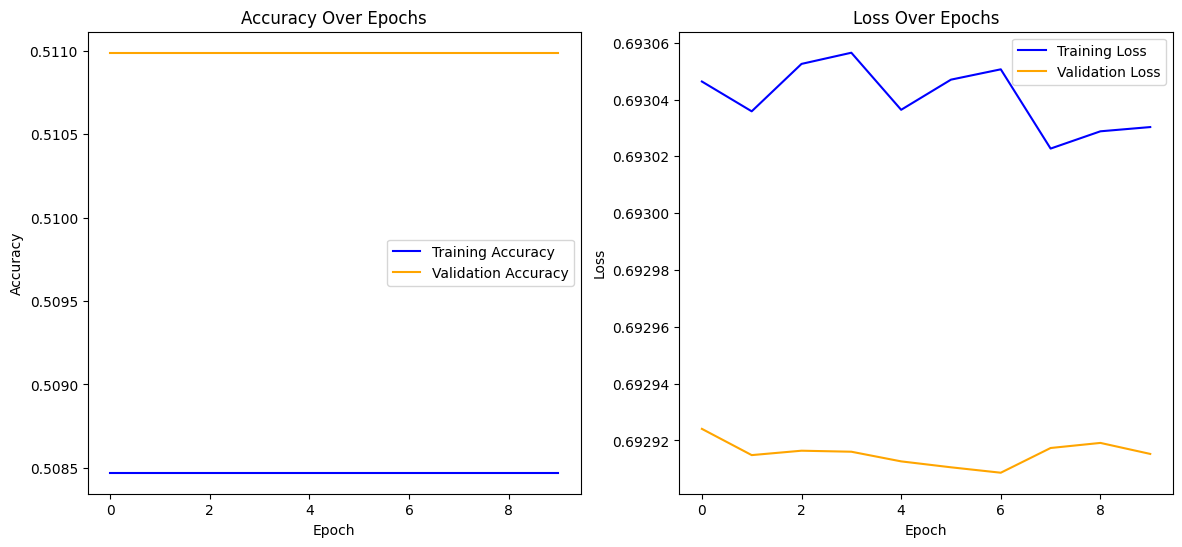

In [29]:
# Plotting Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [41]:
# Save the model
model.save('fake_profile_cnn_model.h5')
print("\nModel saved as 'fake_profile_cnn_model.h5'")



Model saved as 'fake_profile_cnn_model.h5'
